# Importando biblioteca

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Sobre a base de dados

O CIFAR-10, criado pelo Canadian Institute For Advanced Research e desenvolvido por Alex Krizhevsky, Vinod Nair e Geoffrey Hinton, é um conjunto de dados lançado em 2009 para promover a pesquisa em aprendizado profundo e visão computacional. O CIFAR-10 foi projetado para facilitar a experimentação e comparação de algoritmos de classificação de imagens, servindo como um benchmark padrão. Desde seu lançamento, tem sido fundamental para o desenvolvimento de técnicas avançadas como redes neurais convolucionais, regularização por dropout e normalização de lotes, consolidando-se como uma ferramenta essencial tanto para iniciantes quanto para pesquisadores experientes na área.

# Características principais

. O CIFAR-10 contém 50.000 imagens de treino e 10.000 imagens de teste.  

. O conjunto de dados inclui imagens em RGB de tamanho 32x32 pixéis e 3 canais de informação(Cores RGB).  

. As classes são compostas por 10 objetos ou animais reais, sendos estes: Avião, Automóvel, Pássaro, Gato, Veado, Cachorro, Sapo, Cavalo, Navio, Caminhao

. A distribuição das imagens são balanceadas de forma que cada classe possui 6.000 imagens que facilita a geração de uma acurácia mais acertiva   


# Importação e Análise do Dataset

In [2]:
from tensorflow.keras.datasets import cifar10

(x_treino, y_treino), (x_teste, y_teste) = cifar10.load_data()

In [3]:
#Verificando a distribuição
y_treino = pd.Series(data=y_treino.reshape(50000))
dfreq = round(y_treino.value_counts()/len(y_treino)*100, 2)
dfreq.sort_index()

0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5    10.0
6    10.0
7    10.0
8    10.0
9    10.0
Name: count, dtype: float64

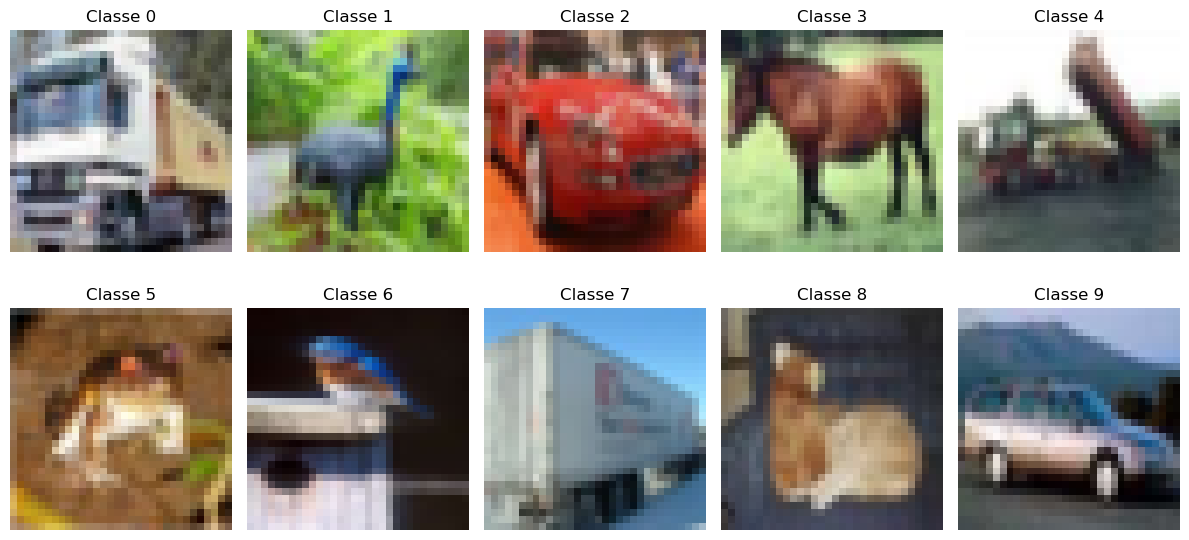

In [4]:
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9] 
indices = [1, 6, 5, 7, 2, 0, 13, 15, 17, 4]

# Definindo o número de linhas e colunas para os subplots
num_rows = 2
num_cols = 5

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6))

for i, idx in enumerate(indices):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].imshow(x_treino[idx], cmap='gray')
    axes[row, col].axis('off')
    axes[row, col].set_title(f'Classe {classes[i]}')

plt.tight_layout()
plt.show()

In [9]:
x_treino.shape, x_teste.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

# Normalização e pre-processamento dos dados

Pelo fato do dataset ja estar praticamente preparado para uso, só teremos uma etapa de pré-processamento que será a conversão dos dados de output de treino e teste em uma matriz com colunas sendo respectivas a cada categoria/classe presenta no dataset. A outra etapa será apenas uma normalização de valores. Como os pixeis estão entre valores entre 0 e 255, iremos normalizar dividindo o valor de um pixel x por 255 para que o valor de x fique entre 0 e 1 e daremos um reshape para transformar a matriz em um array que será correspondente a uma linha do dataframe

In [4]:
def preprocess_images_in_batches(dataset, batch_size=10):
    num_batches = len(dataset) // batch_size
    resized_batches = []
    for i in range(num_batches):
        batch = dataset[i * batch_size:(i + 1) * batch_size]
        resized_batch = np.array([tf.image.resize(img, (224, 224)) for img in batch])
        resized_batches.append(resized_batch)
    return np.concatenate(resized_batches, axis=0)

x_treino = preprocess_images_in_batches(x_treino)
x_teste = preprocess_images_in_batches(x_teste)


x_treino = x_treino/255
x_teste = x_teste/255

MemoryError: Unable to allocate 28.0 GiB for an array with shape (50000, 224, 224, 3) and data type float32

In [4]:
from keras.utils import to_categorical

y_treino = to_categorical(y_treino) 
y_teste = to_categorical(y_teste) 

y_treino, y_teste

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 1., 0., 0.]], dtype=float32))

# Sobre o modelo

O modelo é inspirado na arquitetura AlexNet ganhadora do desafio ImageNet em setembro de 2012 por uma margem fenomenalmente grande em relação aos seus concorrentes

.Rede Neural Convolucional: O objetivo da AlexNet é classificar as imagens do dataset CIFAR-10 em suas respectivas classes.
.Função de Ativação: A função de ativação ReLU foi utilizada nas camadas ocultas, enquanto a função softmax foi aplicada na camada de saída para determinar as probabilidades das classes.
Camada de Entrada: A rede neural possui uma camada de entrada com 150.528 neurônios, correspondentes ao número de pixeis totais multiplicado pela quantidade de canais de cor do RGB.
Camadas Ocultas: A AlexNet consiste em várias camadas convolucionais seguidas de camadas de pooling e camadas totalmente conectadas.
Camada de Saída: A camada de saída possui 10 neurônios, representando as 10 classes possíveis no dataset CIFAR-10.
Otimizadores: O modelo utiliza otimizador Gradiente Descendente Estocastico com Momentum.
Função de Custo: A função de custo utilizada é a categorical_crossentropy, que mede a diferença entre as distribuições de probabilidade previstas e reais.
Obs: Com isso nosso modelo possui um total de aproximadamente 25.000 variáveis(Pesos e bias)

<center><img src="../../imagens/AlexNet1.png"/></center>

In [8]:
96*121 + 96 + 256*25 + 256 + 384*13 + 384 + 384*13 + 384 + 256*13 + 256 + 4096*4096 + 4096 + 4096*4096 + 4096 + 4096*10+10

33636298

# Compilação e treinamento dos modelos

Compilação do modelo:
A métrica usada para validação do eficiencia do modelo foi a métrica da acuracia  
A função de custo(loss ou erro, como preferir) foi definida como a categorical_crossentropy  
O otimizador como o Gradiente descendente estocàstico  

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [6]:
#Criando modelo de rede neural e adicionando as camadas
modelo = Sequential()

#Adicionando camada CNN 1
modelo.add(Conv2D(filters=96, activation='relu', kernel_size=(5,5), strides=(1, 1)))
modelo.add(MaxPooling2D(pool_size=(2,2), padding="same"))

#Adicionando camada CNN 2 input_shape=(32,32,3)
modelo.add(Conv2D(filters=16, activation='relu', kernel_size=(5,5), strides=(1, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))
modelo.add(Flatten())


#Adicionando outra camada densa
modelo.add(Dense(84, activation='relu', kernel_initializer='glorot_uniform'))
modelo.add(Dropout(rate=0.2))
#Adicionando neuronios da camada de saída onde cada neuronio corresponde a uma classe específica do dataset
modelo.add(Dense(y_treino.shape[1], activation='softmax', kernel_initializer='glorot_uniform'))

In [7]:
otimizador = Adam() # Otimizador Adam

In [8]:
#Definindo a compilaçao do modelo como a função de custo sendo a cross-entropy, otimizador o Gradiente descendente estocastico, a métrica de avaliação e eficiencia do modelo sendo a acuracia
modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc'], ) 

Treinamento do modelo:  

O modelo foi treinado por 100 epochs(épocas), o que significa que ele passou pelo conjunto de dados de treinamento 100 vezes.  

Com o tamanho do lote do gradiente descendente estocástico (batch_size) igual a 100, o número de iterações por época será 600 (60.000 exemplos no conjunto de dados dividido pelo tamanho do lote de 100). Portanto, os pesos e os vieses serão atualizados 60.000 vezes ao longo de 100 épocas dentro da rede neural.  

Utilizamos os dados de teste como validação para verificar a presença de overfitting. Como o conjunto de dados não é muito grande, isso nos permite avaliar o desempenho do modelo e ajustar os hiperparâmetros de forma mais eficaz.  

Um dos métodos utilizados para o treinamento foi o Data Argumantation

In [9]:
# Realizando data argumentation no keras:
# Essa função abaixo altera cada imagem de entrada, de acordo com os parâmetros informados, variando aleatoriamente os valores.
# Em cada epoch, o conjunto de dados de treino é sempre diferente. Se eu tinha 50 mil amostras, em cada epoch terei 50 mil, mas
# todas serão ligeiramente diferentes das amostras dos epochs anteriores. Ou seja, é como se em cada epoch eu treinasse com um
# dataset diferente. Quanto mais epochs, mais "datasets" estarei usando

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Configurando o gerador de dados:
aug_data = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
# Passando os dados de entrada para o gerador:
treino_aumentado = aug_data.flow(x_treino, y_treino, batch_size=200)


modelo.compile(loss='categorical_crossentropy', optimizer=otimizador, metrics=['acc'] ) 

n_passadas = int(x_treino.shape[0]/200)
historico = modelo.fit(treino_aumentado, steps_per_epoch=n_passadas, epochs=40, verbose=1, validation_data=(x_teste, y_teste))

Epoch 1/40
250/250 [==============================] - 31s 97ms/step - loss: 2.7306 - acc: 0.0968 - val_loss: 2.3025 - val_acc: 0.1002
Epoch 2/40
250/250 [==============================] - 24s 95ms/step - loss: 2.3027 - acc: 0.0979 - val_loss: 2.3025 - val_acc: 0.1002
Epoch 3/40
250/250 [==============================] - 25s 98ms/step - loss: 2.3026 - acc: 0.0984 - val_loss: 2.3025 - val_acc: 0.1001
Epoch 4/40
250/250 [==============================] - 24s 96ms/step - loss: 2.3026 - acc: 0.0991 - val_loss: 2.3025 - val_acc: 0.1002
Epoch 5/40
166/250 [==================>...........] - ETA: 7s - loss: 2.3027 - acc: 0.0994

KeyboardInterrupt: 

# Teste do modelo

# Observações de aprendizado

Queria deixar um adendo de um detalhe que confundiu minha cabeça, o numero total de iterações por epoch se da no código abaixo:

O modelo avalia a acurácia a cada epoch(ou época, chame do que preferir), e os valores das variaveis que estão sendo alteradas(pesos e bias) mudam a cada iteração dentro do epoch

In [30]:
batch_size=100
epochs=100

total_de_iteracoes_por_epoch = len(x_treino)/batch_size
total_de_iteracoes = total_de_iteracoes_por_epoch*epochs

# O total de iterações por epoch é o total de vezes em que nosso modelo foi treinado por epoch(epoca), ou seja, o total de vezes em que os valores dos pesos e dos bias foram alterados por epoch
# O total de iterações é o total de vezes que nosso modelo foi treinado
total_de_iteracoes_por_epoch, total_de_iteracoes

(600.0, 60000.0)

A principal vantagem de trabalhar com o gradiente descendente estocástico (SGD) é a flexibilidade de manipular o tamanho dos dados a serem treinados por época (epoch). Em um cenário ideal, o número de iterações seria sempre igual à quantidade de epochs. No entanto, como não temos poder de processamento infinito, precisamos otimizar esse processo, e é aí que o SGD se destaca. Com ele, podemos realizar múltiplas iterações utilizando apenas uma vez a base de dados completa, em vez de ter uma iteração por epoch, ou seja, uma iteração por treinamento na base de dados completa.

Por exemplo, podemos ter 60 iterações usando o conjunto de dados completo apenas uma vez, em vez de ter 1 iteração por epoch. Isso permite um treinamento mais eficiente e rápido. No entanto, o SGD não é perfeito. Se o tamanho do lote (batch size) for muito pequeno, o modelo pode desviar significativamente do caminho ideal, resultando em underfitting. Portanto, é crucial escolher um tamanho de lote apropriado.

Mesmo assim, pequenos desvios em uma iteração podem ser corrigidos na próxima, semelhante ao Andar de um bêbado que eventualmente encontra seu caminho!
<center><img src="./imagens/Gradiente descendente estocastico.png"/></center>

Com ele podemos chegar no local ideal que queremos com menos epochs, ou seja, com menos leituras totais na base de dados

# Gráficos de perfomace

Objetivos: Verificar a presença de underfiting e/ou overfiting

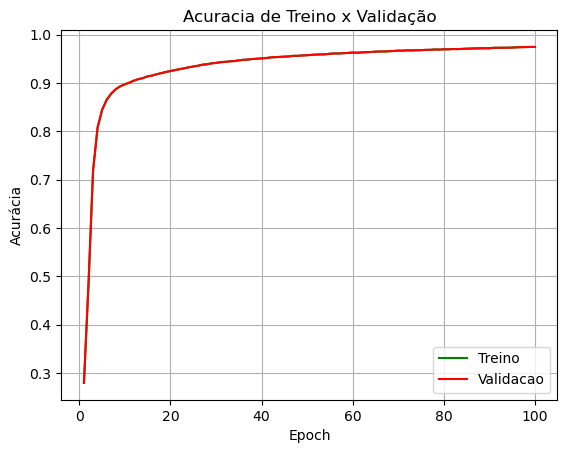

In [41]:
import matplotlib.pyplot as plt

acc_treino = historico.history['acc']
acc_validation = historico.history['acc']

epochs = range(1, len(acc_treino)+1)

plt.plot(epochs, acc_treino, 'g', label='Treino')
plt.plot(epochs, acc_validation, 'r', label='Validacao')
plt.grid(True)
plt.legend()
plt.title('Acuracia de Treino x Validação')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.show()

Tomando com base esse gráfico vemos que aparentemente nosso modelo não está passando pelo processo de overfitting o que é uma boa notícia